#SISTEMA DE RECOMENDACION -  MACHINE LEARNING

###instalamos la libreria scikit-surprise

In [1]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193652 sha256=12c4911c35f6dad49d4e61459f8bff6cb8e1fe8dff3408587a3bf53d9c69617a
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


###cargamos las librerias que se van a utilizar

In [43]:
import pandas as pd
import numpy as np

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###ingestamos los datasets finales ml

In [7]:
df_peliculas_ml = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROYECTO INDIVIDUAL FASE 1/MLOpsReviews/peliculas_final_ml.csv", encoding="UTF8")

In [8]:
df_rating_ml = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROYECTO INDIVIDUAL FASE 1/MLOpsReviews/rating_final_ml.csv", encoding="UTF8")


###seleccionamos los campos que vamos a utilizar de cada ingesta


In [10]:
df_peliculas_ml = df_peliculas_ml[ ['id', 'title'] ]
df_peliculas_ml.head(3)    

,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception


In [11]:
df_rating_ml = df_rating_ml[ ['userId', 'rating', 'movieId'] ]
df_rating_ml.head(3)

,userId,rating,movieId
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381


###procedemos a unir ambos datasets

In [14]:
df_ml = pd.merge(left=df_rating_ml, right=df_peliculas_ml, how='left', left_on='movieId', right_on='id')
df_ml.head()

,userId,rating,movieId,id,title
0,1,1.0,as680,as680,the english civil war
1,1,4.5,ns2186,ns2186,latte and the magic waterstone
2,1,5.0,hs2381,hs2381,la diosa coronada
3,1,5.0,ns3663,ns3663,"frankenstein’s monster’s monster, frankenstein"
4,1,5.0,as9500,as9500,kept woman


###eliminamos la columna id, porque ya tenemos la columna movieId

In [15]:
df_ml.drop("id", axis=1, inplace=True)

In [16]:
df_ml

,userId,rating,movieId,title
0,1,1.0,as680,the english civil war
1,1,4.5,ns2186,latte and the magic waterstone
2,1,5.0,hs2381,la diosa coronada
3,1,5.0,ns3663,"frankenstein’s monster’s monster, frankenstein"
4,1,5.0,as9500,kept woman
...,...,...,...,...
11013818,124380,4.5,ns5272,strong island
11013819,124380,2.5,ns5492,sahara
11013820,124380,3.5,hs305,the last castle
11013821,124380,4.5,ns7881,rocky ii


Dado que la cantidad de registros es de 11 millones, tomaremos una muestra de 100,000

In [19]:
reader = Reader()

set_prueba = 100000

data = Dataset.load_from_df( df_ml[ ['userId', 'movieId', 'rating']][:set_prueba], reader)

###preparamos nuestros sets de entrenamiento y test

In [20]:
trainset, testset = train_test_split(data, test_size=.25)

###para este modelo vamos a usar el SVD

In [21]:
from surprise import SVD
model = SVD()

###entrenamos el modelo

In [22]:
model.fit(trainset)

###predecimos

In [23]:
predictions = model.test(testset)

In [24]:
predictions[1]

Prediction(uid=837, iid='ns13', r_ui=3.5, est=3.592357078211451, details={'was_impossible': False})

###hacemos una prediccion al azar

In [25]:
model.predict(83, 'as400')

Prediction(uid=83, iid='as400', r_ui=None, est=4.051552694156742, details={'was_impossible': False})

###tomaremos un usuaario y le hacemos una recomendacion

In [31]:
usuario = 999
rating = 4   # Tomamos películas a las que haya calificado con mas de 3 estrellas
df_user = df_ml[(df_ml['userId'] == usuario) & (df_ml['rating'] >= rating)]
df_user.head(3)

,userId,rating,movieId,title
98785,999,4.0,as1625,monster high adventures of the ghoul squad
98786,999,5.0,as1522,nature: parrot confidential
98789,999,5.0,ns1217,romantik komedi 2: bekarlığa veda


In [32]:
df_user = df_user.reset_index(drop=True)

In [33]:
recomendaciones_usuario = df_peliculas_ml.iloc[:4499].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 2)


,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker


###extraemos la pelicula que ya vio

In [34]:
usuario_vistas = df_rating_ml[ df_rating_ml['userId'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(62, 3)


,userId,rating,movieId
98785,999,4.0,as1625
98786,999,5.0,as1522
98787,999,3.0,as4711
98788,999,3.0,ns2853
98789,999,5.0,ns1217


###procedemos a recomendar

In [36]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['id'].apply(lambda x: model.predict(usuario, x).est)

In [37]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head()

,id,title,Estimate_Score
2255,as2256,happythankyoumoreplease,4.113859
2108,as2109,infinity chamber,4.043649
441,as442,the souvenir,4.035306
1845,as1846,little baby bus and friends,4.029584
201,as202,valentine dayz,4.004951


###evaluamos el modelo

In [38]:
accuracy.rmse(predictions)


RMSE: 0.9589


0.9588859389241066

###luego de evaluar el modelo procedemos a crear una funcion para usar la prediccion

In [39]:
def prediccion_modelo (userId, movieId):
    prediction = model.predict(userId, str(movieId))

    # para valores mayores o igual a 3.5, se recomienda
    if prediction.est >= 3.5:
        return "Se recomienda", prediction.est
    else:
        return "No se recomienda", prediction.est

###probamos la prediccion

In [40]:
prediccion_modelo(33, 'as442')

('Se recomienda', 4.376173979137144)

###optimizamos los hiperparametros

In [44]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9478  0.9494  0.9513  0.9495  0.0014  
Fit time          0.45    0.49    0.47    0.47    0.02    
Test time         0.33    0.33    0.38    0.34    0.02    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9519  0.9478  0.9491  0.9496  0.0017  
Fit time          0.58    0.56    0.57    0.57    0.01    
Test time         0.44    0.46    0.22    0.37    0.11    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9485  0.9510  0.9501  0.9499  0.0011  
Fit time          0.48    0.54    0.81    0.61    0.15    
Test time         0.22    0.22    0.21    0.21    0.00    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9565  0.9

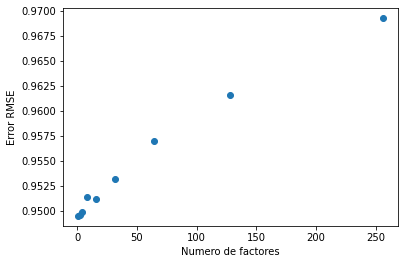

In [45]:
import matplotlib.pyplot as plt

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

#interfaz con Gradio